## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

## Изучение данных из файла
Путь к файлу: /datasets/games.csv. Скачать датасет

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.info() #общая инфо о базе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()#пропуски есть в 6 столбцах
df.isna().mean().round(3)*100

Name                0.0
Platform            0.0
Year_of_Release     1.6
Genre               0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
Critic_Score       51.3
User_Score         40.1
Rating             40.5
dtype: float64

In [ ]:
df.duplicated().sum() #дубликатов нет

0

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5556,SWAT: Global Strike Team,PS2,2003.0,Shooter,0.16,0.12,0.00,0.04,69.0,7.8,M
11755,Nicola Kanshuu: Model Oshare * Audition Platina,3DS,2012.0,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
6125,Fable: The Journey,X360,2012.0,Role-Playing,0.18,0.08,0.00,0.02,61.0,4.8,T
7683,The Fairly Odd Parents: Enter the Cleft,GBA,2002.0,Platform,0.14,0.05,0.00,0.00,NaN,NaN,NaN
14246,Mashiro Iro Symphony: *mutsu-no-hana,PSP,2011.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN


1. в базе 11 столбцов, 16715 записей\

2. пропуски в 6 столбцах, от 2 до 8578 строк\
основные пропуски (40-51%) оценках критиков, пользователей и рейтинге\
Name                  2\
Year_of_Release     269\
Genre                 2\
Critic_Score       8578\
User_Score         6701\
Rating             6766


3. дубликатов пока нет

4. Данные по играм начиная с 1980г по 2016г, но тоже есть пропуски - 269 строк\
Свыше 50% записей с нулевыми продажами в Японии, и свыше 25% - в Северной Америке и Европе и других странах.
Максимум продаж по каждому рынку сильно отличается от 3 квартиля (41 vs 0,24 для Северной Америки, и т.п.) - похоже на выбросы, которые нужно исследовать.

5. Оценки критиков лежат в диапазоне 60-79, минимум =13, 100 баллов никто не поставил, мах=98.

6. Нужно изменить тип данных: User_Score - заменить object на float64


## Предобработка данных
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**названия столбцов**

In [ ]:
df.columns = df.columns.str.lower()  
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1539,Yakuman,GB,1989.0,Misc,0.0,0.0,1.28,0.0,NaN,NaN,NaN


**строковое значение tbd** помешает изменить тип данных в столбце с оценками пользователей.\
tbd = to be determined = оценки нет, т.е. нужно поставить пропуск.
tbd это строка, а пропуск - это float.  
Пока в столбце есть строки, нельзя работать с ним как с числовым (например, посчитать его корреляцию с другими параметрами).

In [ ]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**замена типов данных**

In [ ]:
df['user_score'] = df['user_score'].astype('float64')

**пропуски в названии и жанре** - это всего 2 строки, их можно удалить из таблицы

In [ ]:
print(df.loc[(df['name'].isna()) | (df['genre'].isna())])
df = df.loc[~((df['name'].isna()) | (df['genre'].isna()))] 
df.isna().sum()

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

**пропуски в столбце год выпуска**
- 269 строк или 1,6% от общего числа записей, также можно удалить из таблицы
- или можно заменить на 0, чтобы было проще работать с данными, т.к. эти записи могут изменить статистику внутри какого-нибудь 
специфического сегмента\периода. Список 269 - относительно небольшой, можно отдать его на перепроверку.

In [ ]:
df.loc[df['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000,127.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416,7.049606
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740,1.536688
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000,1.800000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000,6.400000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000,7.400000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000,8.150000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000,9.500000


Оказалось, что среди этих записей есть игры с высоким рейтингом и продажами - эта информация нас интересует, поэтому пропуски меняю на заглушку "no_data", чтобы видеть эту категорию на последующих этапах анализа

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna('no_data')
df['year_of_release'].unique()

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, 'no_data',
       1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0], dtype=object)

**пропуски в оценках**
- пропусков очень много, удалять нельзя
- можно заменить на среднее по категории (год выпуска, рейтинг)
- можно заменить на 0, как маркер пропуска, но это исказит результаты корреляционного анализа и стат-тестов.

вывод - пока оставим пропуски как есть.

**пропуски в рейтинге**
можно пометить значением-заглушкой, т.к. в в столбце не числовые, а категориальные данные.   
пропуск не будет показываться при группировках, а категория no_data будет

In [ ]:
df['rating'] = df['rating'].fillna('no_data')
df['rating'].unique()

array(['E', 'no_data', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**суммарные продажи во всех регионах**

In [ ]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
1364,Medal of Honor: Warfighter,PS3,2012,Action,0.48,0.62,0.06,0.26,55.0,6.0,M,1.42


<div class="alert alert-info">
На этапе предобработки данных были обработаны пропуски с данных, заменен тип данных и добавлен суммирующий столбец:
    
1. названия столбцов были приведены к нижнему регистру
2. в столбце user_score (оценка пользователя) произведена замена "tbd" на пропуск, 
для корректной работы с этим столбцов на следующих этапах анализа. 
Также заменен тип данных на float.
3. пропуски в названии (name) и жанре (genre) - это всего 2 строки, удалены из таблицы
4. пропуски в столбцах год выпуска (year_of_release) и рейтин (rating) заменены на заглушку "no_data", чтобы видеть эту категорию на последующих этапах анализа
6. добавлен столбец sales_total с суммарными продажами во всех регионах


</div>

## Исследовательский анализ данных

<div class="alert alert-info">
    
- сколько игр выпускалось в разные годы
- как менялись продажи по платформам
- платформы с наибольшими суммарными продажами, распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- определить актуальный период, эти данные помогут построить прогноз на 2017 год
- какие платформы лидируют по продажам, растут или падают? 
- выбрать несколько потенциально прибыльных платформ.
- график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
</div>

#### сколько игр выпускалось в разные годы
Важны ли данные за все периоды?

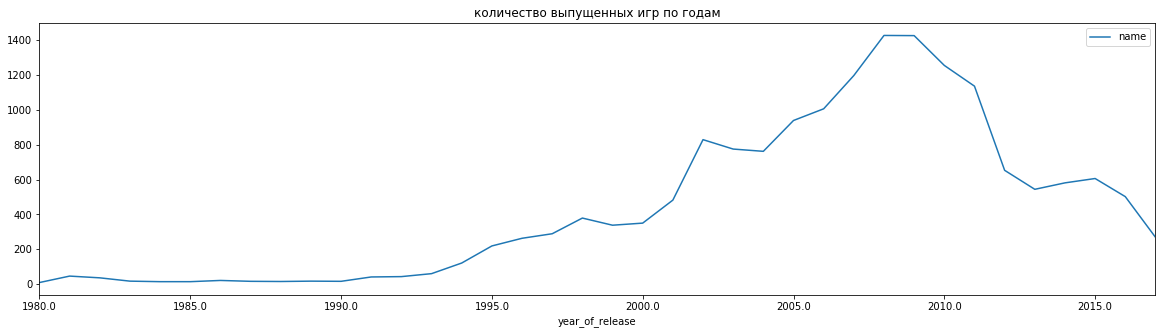

In [ ]:
#plt.style.use('ggplot')
df.pivot_table(index = 'year_of_release', values ='name', aggfunc='count').plot(figsize = (20,5));
plt.title("количество выпущенных игр по годам")
plt.show()


In [ ]:
#df.pivot_table(index = 'year_of_release', values ='name', aggfunc='count')

In [ ]:
#после 2016 года на графике указана количество игр с пропуском года "no_data"
#df.pivot_table(index = 'year_of_release', values ='name', aggfunc='count')

In [ ]:
df.groupby('year_of_release')['name'].count().describe().round(2)

count      38.00
mean      439.82
std       446.37
min         9.00
25%        37.25
50%       313.50
75%       734.75
max      1427.00
Name: name, dtype: float64

имеют значение года с количеством игр от 37( Q1)  
по графику видно, что для анализа можно брать данные за последние 15-20 лет, т.е. с 1996-2000 годов.

#### как менялись продажи по платформам
какие платформы с наибольшими суммарными продажами, построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
# образец для создания функции по расчету топ позиций

#top_10 = (df.groupby('platform')
#                    .agg({'sales_total': 'sum'})
#                    .sort_values(by = 'sales_total')
#                    .tail(10)
#                    .index)
#print(top_10)

##### функция по созданию топ позиций, на входе:

- длина ретинга, 
- таблица, 
- колонка для рейтинга (платформы, игры, года и т.д.), 
- колонка с продажами (Северная Америка, Европа, Япония, другие страны, тотал)

In [ ]:
def top_items_sales(number, database, col_rating, col_market):
    return (database.groupby(col_rating)
                    .agg({col_market: 'sum'})
                    .sort_values(by = col_market)
                    .tail(number)
                    .index)


In [ ]:
# определим список из топ 10 платформ по суммарным продажам за год
top_10 = top_items_sales(10, df, 'platform', 'sales_total')
top_10

Index(['PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

##### функция по созданию графика продаж, на входе:

- таблица или срез данных
- данные для оси Х, 
- данные для оси Y, 
- легенда (линии = платформы и т.п.), 
- способ расчета (сумма или количество, и т.п.)

In [ ]:
# образец для создания функции

#top_10_platforms = df.query('platform in @top_10')
#top_10_platforms.pivot_table(index = 'year_of_release', 
#                             columns = 'platform', 
#                             values = 'sales_total', 
#                             aggfunc = 'sum').plot(figsize = (20,5));
#plt.title("Продажи топ 10 игровых платформ по годам")
#plt.ylabel('Продажи млн копий')
#plt.xlabel('Год выпуска')

In [ ]:
def pivot_to_plot(database, x_col, y_col, legend, agg):
    plot = database.pivot_table(index = x_col, columns = y_col, values = legend, aggfunc = agg).plot(figsize = (20,5));
    plt.ylabel('Продажи млн копий')
    plt.xlabel('Год выпуска')
    return plot

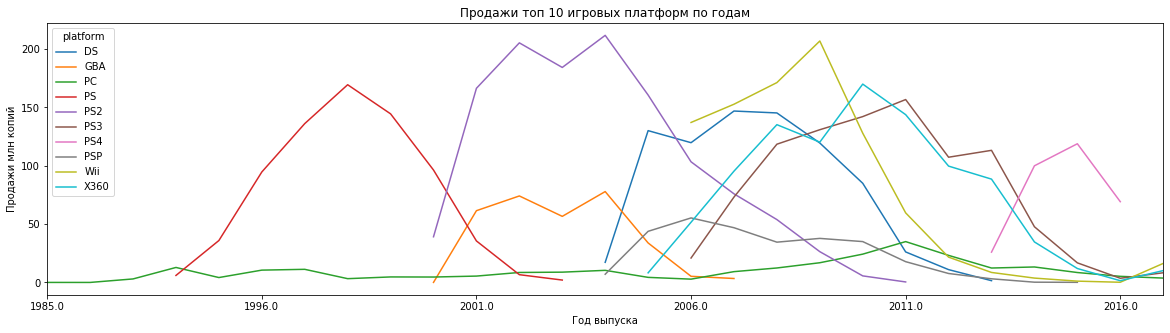

In [ ]:
top_10_platforms = df.query('platform in @top_10')
pivot_to_plot(top_10_platforms, 'year_of_release', 'platform', 'sales_total', 'sum')
plt.title("Продажи топ 10 игровых платформ по годам")
plt.show()

In [ ]:
sales_level = 5 # значимый порог продаж платформы

# суммарные продажи в год выше порога
report = top_10_platforms.groupby(['platform', 'year_of_release']).agg({'sales_total': 'sum'}).query('sales_total > @sales_level')

# среднее число лет жизни платформы из списка топ 10
report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean()

year_of_release    9.8
dtype: float64

In [ ]:
# создаем таблицу без топовых платформ
df_other_platforms = df.query('platform not in @top_10')

# суммарные продажи в год выше порога
report = df_other_platforms.groupby(['platform', 'year_of_release']).agg({'sales_total': 'sum'}).query('sales_total > @sales_level')

# среднее число лет жизни платформы не из списка топ_10
report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean()

year_of_release    5.285714
dtype: float64

средний срок жизни топовой платформы почти 10 лет, а остальных почти в 2 раза меньше - около 5 лет на рынке  
порог значимости - 5 млн проданных копий в год

#### актуальный период
опрделить актуальный период в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывать в работе данные за предыдущие годы.

на основе предыдущего пункта за актуальный период можно взять 5-10 лет.  
Я выбираю максимум - 10 лет.

<div class="alert alert-info">

10 лет может показаться слишком большим сроком для такой динамично развивающейся индустрии, но и 2 года может быть недостаточным для человека, мало знакомого с рынком компьютерных игр. Этот срок подойдет более опытному аналитику, который может сфокусироваться на поиске и анализе микротрендов держа в уме всю историю развития компьютерных игр.
 
10 летний период помогает увидеть пик продаж компьютерных игр и проанализировать падение с 2008 года. Мода циклична, и такой период анализа может выявить мега-звезды прошлых лет, которые в новом формате будут востребованы у повзрослевшей публики. 
    
Если учесть общий тренд на снижение объемов продаж, необходимо увидеть немного предыстории в анализе. Иначе есть риск сделать неверный выбор или принять неадекватное решение основываясь на недостаточном количестве данных.   
</div>

<div class="alert alert-info">

я сохранила предыдущий вариант с актуальным периодом 10 лет, а сейчас изменила расчеты на 3 года.
</div>

In [ ]:
# создаем таблицу с данными за последние 10 лет и отдельно - 3 года
actual_10 = np.arange(2006,2017,1)  # список нужных лет
actual = np.arange(2014,2017,1)  # список нужных лет
df_actual = df.query('year_of_release in @actual') # срез данных за актуальный период
df_actual['year_of_release'].unique() # проверка

array([2015.0, 2014.0, 2016.0], dtype=object)

##### Какие платформы лидируют по продажам, растут или падают? Список потенциально прибыльных платформ.

In [ ]:
# список платформ, которые все еще продаются в текущем году (2016)
df_2016 = df_actual.query('year_of_release == [2016.0]') # срез по 2016 году
actual_platforms = df_2016['platform'].unique() # список платформ
actual_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

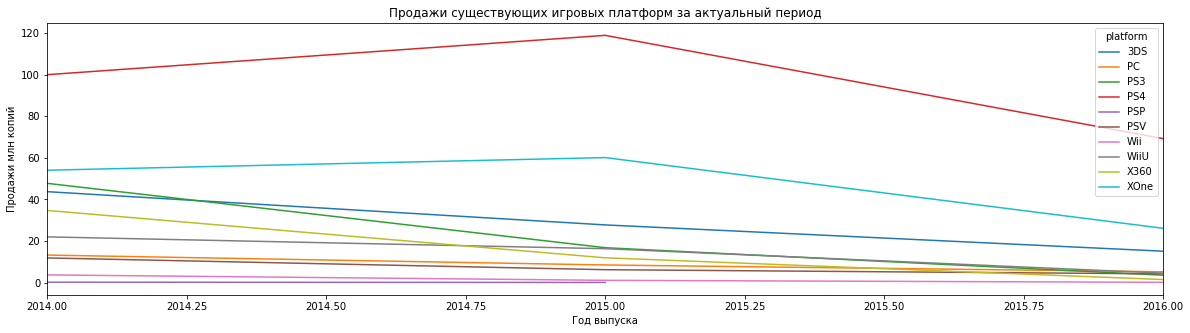

In [ ]:
# динамика продаж этих платформ за актуальный период
pivot_to_plot(df_actual, 'year_of_release', 'platform', 'sales_total', 'sum')
plt.title("Продажи существующих игровых платформ за актуальный период")
plt.show()

** Вывод за 10 лет**
наблюдается общая тенденция к снижению объема продаж по всем платформам.  
в 2011-2013 году появились 5 новых, но и их продажи снижаются после небольшого подъема в 2015г.  
- лидеры рынка, был рост продаж в 2015: PS4 + XOne  
- не самые удачные запуски 2011-2012: 3DS + PSV + WiiU
- вечнозеленый = низкие продажи, но постоянный тренд на протяжении многих лет: РС  
- лидеры продаж 2006-2013, но спад продаж в 2016: Wii + X360 +PS3

потенциально прибыльные: PS4 + XOne + РС  это лидеры и стабильность

<div class="alert alert-block alert-info">
**выводы за 3 года**
    
Общий тренд на снижение продаж,\
Потенциально прибыльные платформы  - лидеры рынка в настоящий момент с большим отрывов от конкурентов:
    PS4 + XOne + 3DS
    
</div>

In [ ]:
# та же самая информация в виде таблицы
df_actual.query('platform in @actual_platforms').pivot_table(index = 'year_of_release', 
                             columns = 'platform', 
                             values = 'sales_total', 
                             aggfunc = 'sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


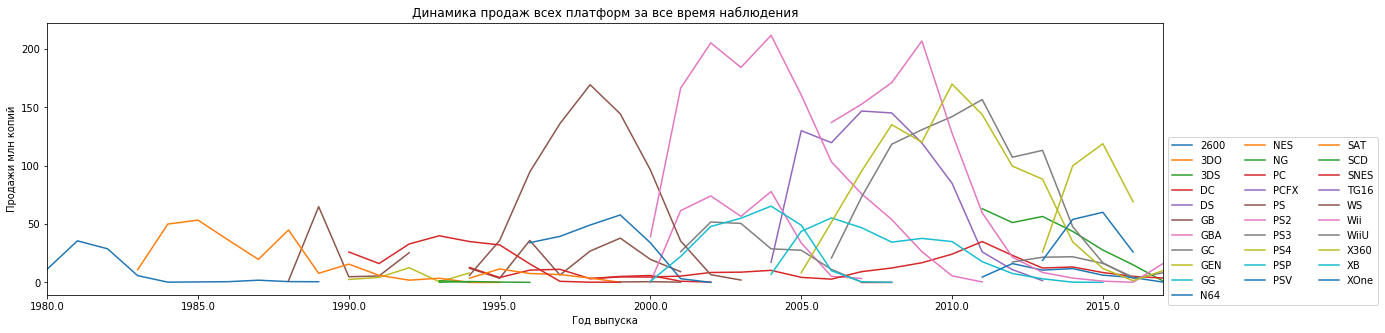

In [ ]:
# динамика продаж всех платформ за все время наблюдения
pivot_to_plot(df, 'year_of_release', 'platform', 'sales_total', 'sum')
plt.title("Динамика продаж всех платформ за все время наблюдения")
plt.legend(bbox_to_anchor=(1, 0.6), ncol = 3)
plt.show()

у некоторых платформ после незначительного снижения был второй пик продаж, поэтому в 2017 году можно ожидать возвращение популярности некоторых из существующих платформ

##### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам и описание результата.

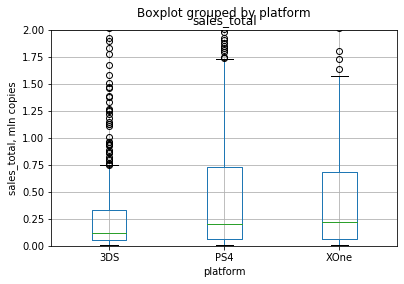

In [ ]:
# топ 3 платформы 2016 года
top_3 = top_items_sales(3, df_2016, 'platform', 'sales_total')

# график «ящик с усами» по глобальным продажам лидеров 2016 года
df.query('platform in @top_3').boxplot('sales_total', by='platform')
plt.ylabel('sales_total, mln copies')
plt.ylim(0,2);

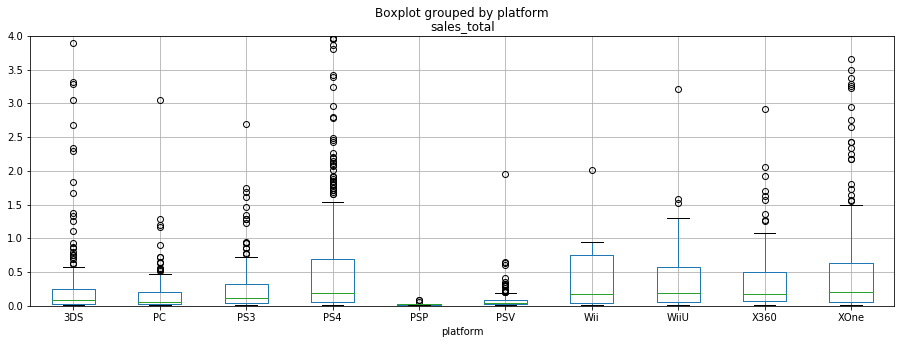

In [ ]:
# график «ящик с усами» по глобальным продажам всех платформ за актуальный период
df_actual.boxplot(column = 'sales_total', by = 'platform', figsize = (15,5))
plt.ylim(0,4);

почти по всем платформам за актуальный период были многочисленные выбросы - это игры-хиты с аномально высокими продажами.  
платформы лидеры с высокой медианой: PS3, PS4, Wii, WiiU, X360, XOne, у них также наблюдается сдвиг распределения вправо, в сторону более высоких объемов продаж (Q3-Q4)

<div class="alert alert-block alert-info">

особенно много таких удачных запусков как раз у лидеров рынка: PS4 + XOne + 3DS
    
</div>

анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы. Диаграмма рассеяния и расчет корреляции между отзывами и продажами. Выводы.

In [ ]:
# создадим срез по платформе PS4, входит в топ3 2016 года
platform = 'PS4'
df_platform = df_actual.query('platform == @platform')

Оценка игр на платформе PS4


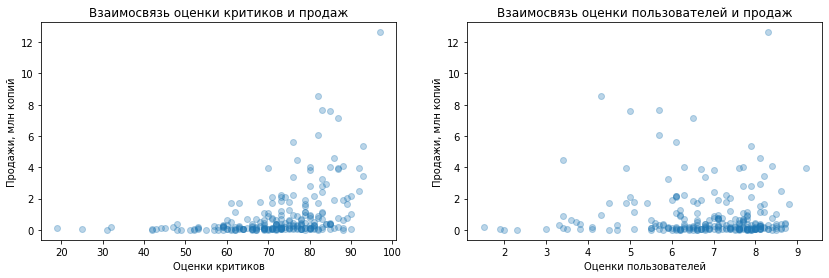

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (14,4))
print('Оценка игр на платформе', platform)
ax1.scatter(x=df_platform['critic_score'], y=df_platform['sales_total'], alpha=0.3)
ax1.set_title('Взаимосвязь оценки критиков и продаж')
ax1.set_xlabel('Оценки критиков')
ax1.set_ylabel('Продажи, млн копий')

ax2.scatter(x=df_platform['user_score'], y=df_platform['sales_total'], alpha=0.3)
ax2.set_title('Взаимосвязь оценки пользователей и продаж')
ax2.set_xlabel('Оценки пользователей')
ax2.set_ylabel('Продажи, млн копий')
plt.show()

In [ ]:
print('Коэффициент корреляции между продажей игр на', platform, 'и оценками критиков', 
      df_platform['critic_score'].corr(df_platform['sales_total']).round(2))

print('Коэффициент корреляции между продажей игр на', platform, 'и оценками пользователей', 
      df_platform['user_score'].corr(df_platform['sales_total']).round(2))

Коэффициент корреляции между продажей игр на PS4 и оценками критиков 0.4
Коэффициент корреляции между продажей игр на PS4 и оценками пользователей -0.04


есть небольшое положительное влияние оценки критиков на продажи игр на PS4 (лучше оценки - выше продажи)  
но оценки пользователей практически не влияют на продажи - коэфф корреляции близок к нулю.

##### Соотнесите выводы с продажами игр на других платформах.

In [ ]:
for form in actual_platforms:
    df_form = df_actual.query('platform == @form')
    print(form)
    print('оценка критиков', df_form['critic_score'].corr(df_form['sales_total']))
    print('оценка пользователей', df_form['user_score'].corr(df_form['sales_total']))
    print()

PS4
оценка критиков 0.40266141068104083
оценка пользователей -0.040131589472697356

3DS
оценка критиков 0.314117492869051
оценка пользователей 0.2151932718527028

XOne
оценка критиков 0.42867694370333226
оценка пользователей -0.0703839280647581

WiiU
оценка критиков 0.370201412480884
оценка пользователей 0.40792645792170773

PS3
оценка критиков 0.44657460493190704
оценка пользователей -0.16676141347662118

PC
оценка критиков 0.17463413769350036
оценка пользователей -0.07159665703472451

X360
оценка критиков 0.5257228356581523
оценка пользователей -0.138444570945665

PSV
оценка критиков 0.04266490657009526
оценка пользователей -0.16845504978064446

Wii
оценка критиков nan
оценка пользователей 1.0



**ВЫВОДЫ по актуальному периоду = 10 лет**

такая же ситуация и по играм на платформах PS2, PS3, X360, PC
дополнительно можно отметить:

PSP - оценки пользователей и критиков имеют небольшое положительное влияние на продажи
GBA - мнение пользователей имеет отрицательное влияние на продажи (рост одной величины связан с уменьшением другой), а оценка критиков почти ничего не значит
Wii - оценки критиков и пользователей почти не влияют на продажи 

<div class="alert alert-info">

**ВЫВОДЫ по актуальному периоду = 3 года**

такая же ситуация и по играм на всех платформах, актуальных на 2016 год - оценки критиков имеют положительное влияние на продажи игр, а оценки пользователей почти ничего не значат.

исключение:
    - PC - очень слабое влияние критиков
    - WiiU - оценки пользователей также важны для продаж, как и оценки критиков.

</div>

##### Анализ общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'продажи, млн копий')

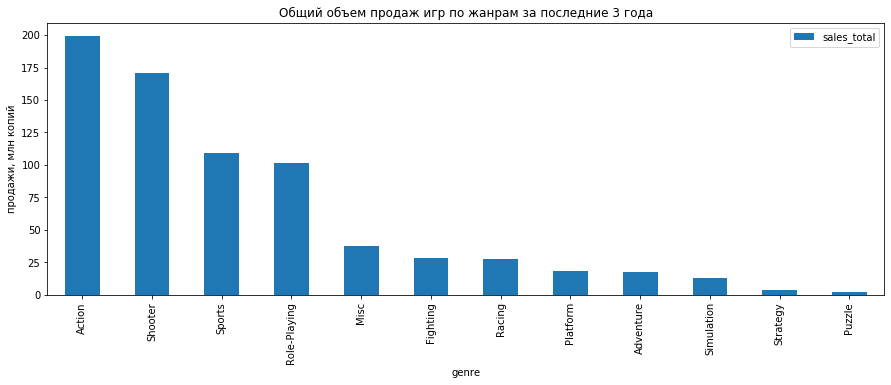

In [ ]:
[df_actual.pivot_table(index = 'genre', 
                       values = 'sales_total', 
                       aggfunc = 'sum')
 .sort_values(by = 'sales_total', ascending = False)
 .plot(kind='bar', figsize = (15,5))
]
plt.title('Общий объем продаж игр по жанрам за последние 3 года')
plt.ylabel('продажи, млн копий')

Text(0, 0.5, 'продажи, млн копий')

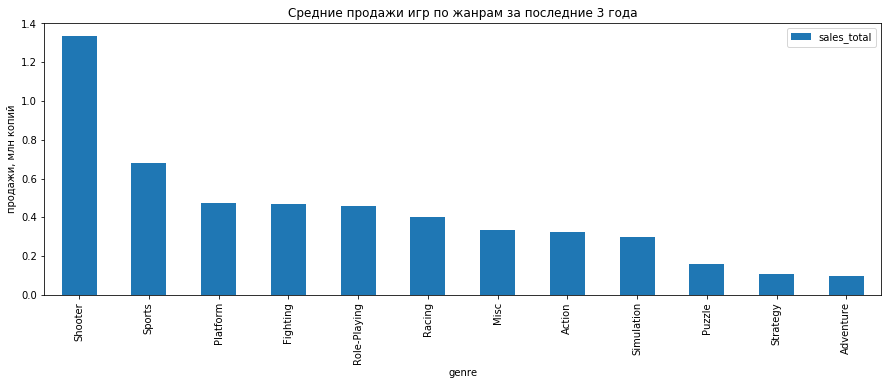

In [ ]:
[df_actual.pivot_table(index = 'genre', 
                       values = 'sales_total', 
                       aggfunc = 'mean')
 .sort_values(by = 'sales_total', ascending = False)
 .plot(kind='bar', figsize = (15,5))
]
plt.title('Средние продажи игр по жанрам за последние 3 года')
plt.ylabel('продажи, млн копий')

Вывод:\
В целом за актуальный период наиболее продаваемыми оказались игры в жанрах Action, Sports, Shooter\
но если посмотреть средние продажи внутри каждого жанра, то в лидеры выходят с большим отрывом Shooter, далее Platform, Sports\
из этого можно сделать вывод, что жанр Action показал хороший результат за счет большого количества игр внутри категории.\
Sports, Shooter - стабильно прибыльные во всех смыслах

<div class="alert alert-info">
Выводы: 
    
- пик продаж пришелся на 2008-2009 гг. - свыше 1400 игр в год. Потом снижение до 500 игр в 2016 году.
- список топ 10 платформ за всю историю наблюдений: 'PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'
- средний срок жизни топовой платформы почти 10 лет, а остальных почти в 2 раза меньше - около 5 лет на рынке
порог значимости - 5 млн проданных копий в год
- значимый период для анализа может быть от 10 лет и меньше. Учитывая, что ситуация на рынке игр очень быстро меняется, для построения прогноза на 2017 год можно взять данные с 2014года. 
- лидеры рынка в настоящий момент с большим отрывов от конкурентов: PS4 + XOne + 3DS, но и их продажи снижаются. Стабильный тренд у РС, но уровень продаж невысокий. 
- несмотря на общее снижение продаж по всем платформам, история наблюдений показывает, что возможен второй пик продаж после некоторого снижения, а значит, в 2017 году можно ожидать возвращение популярности некоторых из существующих платформ
    
- почти по всем платформам за актуальный период были многочисленные выбросы - это игры-хиты с аномально высокими продажами.  платформы лидеры с высокой медианой: PS3, PS4, Wii, WiiU, X360, XOne, у них также наблюдается сдвиг распределения вправо, в сторону более высоких объемов продаж (Q3-Q4)\
особенно много таких удачных запусков как раз у лидеров рынка: PS4 + XOne + 3DS
- есть небольшое положительное влияние оценки критиков на продажи игр на PS4 (лучше оценки - выше продажи)
но оценки пользователей практически не влияют на продажи - коэфф корреляции близок к нулю.
такая же ситуация и по играм на всех платформах, актуальных на 2016 год - оценки критиков имеют положительное влияние на продажи игр, а оценки пользователей почти ничего не значат.\
исключение: - PC (очень слабое влияние критиков) и WiiU (оценки пользователей также важны для продаж, как и оценки критиков).
    
- В целом за актуальный период наиболее продаваемыми оказались игры в жанрах Action, Sports, Shooter
но если посмотреть средние продажи внутри каждого жанра, то в лидеры выходят с большим отрывом Shooter, далее Platform, Sports\
из этого можно сделать вывод, что жанр Action показал хороший результат за счет большого количества игр внутри категории.\
Sports, Shooter - стабильно прибыльные во всех смыслах
    
    
</div>

## Портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.\
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
# список регионов для анализа
regions = ['eu_sales', 'na_sales', 'jp_sales']

In [ ]:
# столбцы с процентами продаж
df_actual['eu_pct'] = df_actual['eu_sales'] / df_actual['eu_sales'].sum()
df_actual['na_pct'] = df_actual['na_sales'] / df_actual['na_sales'].sum()
df_actual['jp_pct'] = df_actual['jp_sales'] / df_actual['jp_sales'].sum()

### функция для расчета топ 5 по каждому региону + график
на входе
- колонка с продажами по региону (из списка выше)
- колонка, по которой группируем и ищем топ 5


In [ ]:
def plot_top5_region(region, platform_or_genre):
    top_5 = top_items_sales(5, df_actual, platform_or_genre, region)  #использую функцию из 4.0.2.1
    print(region, top_5)
    df_new1 = df_actual
    df_new1['new'] = df_new1[platform_or_genre]                       # заполняю служебный столбец копией данных (все жанры)
    df_new1.loc[(~df_new1[platform_or_genre].isin(top_5)), 'new'] = 'other'  # оставляю только топ 5 наименований, а остальное заполняю заглушкой
    plot = df_new1.pivot_table(index = 'new', 
                               values = region, 
                               aggfunc = 'sum').plot(kind = 'pie', 
                                                     x='new',
                                                     y=region,
                                                     figsize=(5,5), 
                                                     autopct = '%1.1f%%', 
                                                     title = region);
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))     
    return plot

### Самые популярные платформы (топ-5). Различия в долях продаж.

eu_sales Index(['3DS', 'PC', 'PS3', 'XOne', 'PS4'], dtype='object', name='platform')
na_sales Index(['PS3', '3DS', 'X360', 'XOne', 'PS4'], dtype='object', name='platform')
jp_sales Index(['WiiU', 'PS3', 'PSV', 'PS4', '3DS'], dtype='object', name='platform')


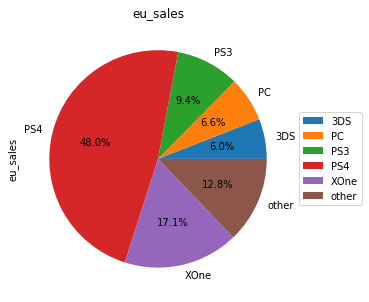

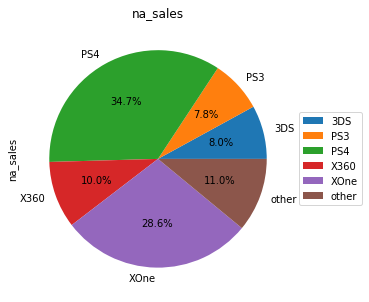

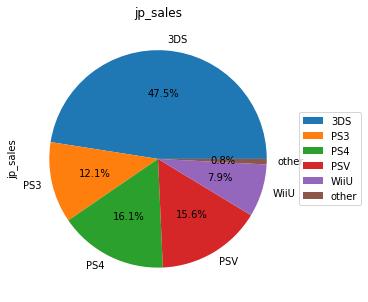

In [ ]:
#расчет топ 5 платформ по каждому региону
for region in regions:
    plot_top5_region(region, 'platform')

***выводы  10 лет**

на всех 3 рынках топ 5 платформ занимают свыше 75% от всех продаж, 
основные платформы так или иначе присутствуют на всех рынках, кроме:
- Х360 отсутствует в Японии, но на других рынках показывает хорошие результаты
- вместо не в Японии популярна DS, которая занимает меньшую долю других рынках:

Топ 3 платформы:\
eu_sales('Wii = 17,3%', 'X360 = 17,9%', 'PS3 = 21,9%')\
na_sales('PS3 = 16,3%', 'Wii = 20,4%', 'X360 = 24,7%')\
jp_sales('PS3 = 14,1%', '3DS = 17,9%', 'DS = 25,2%')

<div class="alert alert-info">

**Выводы 3 года:**
    
- на всех 3 рынках топ 5 платформ занимают свыше 75% от всех продаж,
- на каждом рынке есть заметный лидер-монополист: Европа = PS4 (48%), Япония = 3DS(48%), Америка - 2 платформы PS4(35%) и XOne(29%)
      
</div>

### Самые популярные жанры (топ-5). Пояснить разницу.

eu_sales Index(['Racing', 'Role-Playing', 'Sports', 'Shooter', 'Action'], dtype='object', name='genre')
na_sales Index(['Misc', 'Role-Playing', 'Sports', 'Action', 'Shooter'], dtype='object', name='genre')
jp_sales Index(['Shooter', 'Misc', 'Fighting', 'Action', 'Role-Playing'], dtype='object', name='genre')


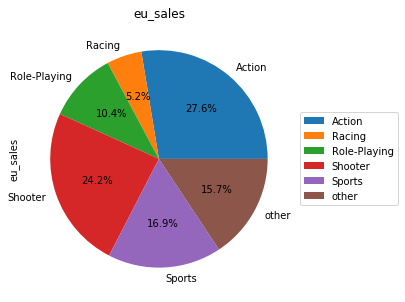

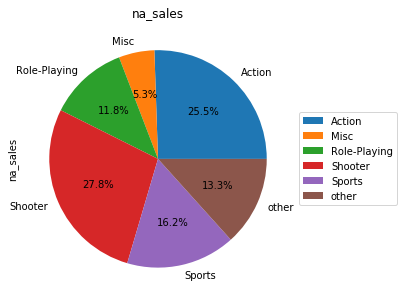

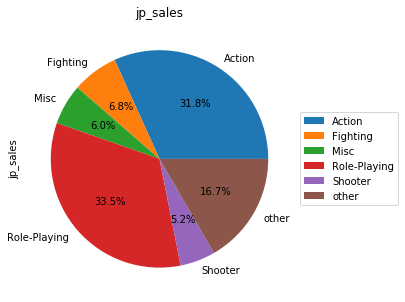

In [ ]:
#расчет топ 5 жанров по каждому региону
for region in regions:
    plot_top5_region(region, 'genre')     

Игры жанров Action и Misc хорошо продаются на всех рынках\
В Японии популярны игры Role Playing

<div class="alert alert-info">

**Выводы 3 года:**
    
- игры в жанрах Action + Shooter занимают более 50% продаж в Европе и Америке,
- в Японии пара лидеров - Role-Playing и Action (65% продаж)
      
</div>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
можно проанализировать, например, средние продажи в зависимости от рейтингов

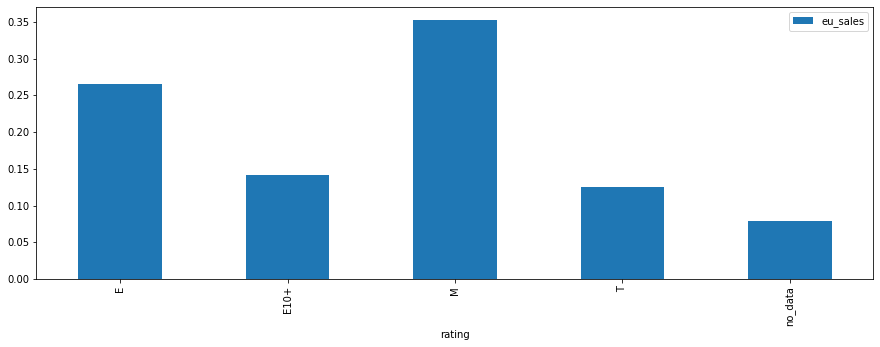

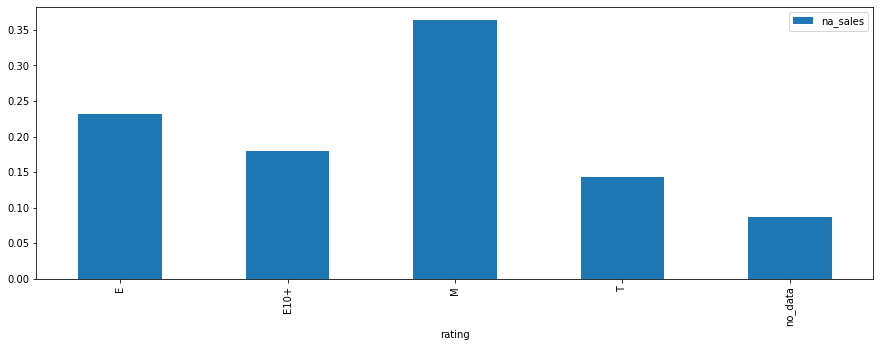

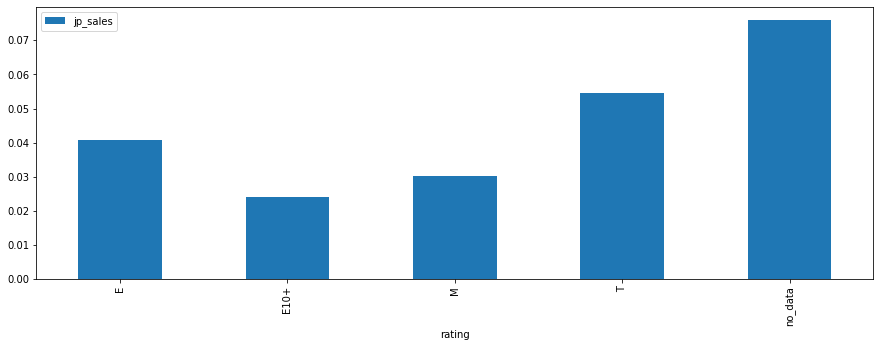

In [ ]:
for region in regions:
    df_actual.pivot_table(index = 'rating', 
                          values = region, 
                          aggfunc = 'mean').plot(kind='bar', figsize = (15,5))

<div class="alert alert-block alert-info">
    
На европейском и американском рынках игры категории «M» («Mature») — «Для взрослых» в среднем продаются намного больше, чем другие категории, на втором месте игры категории «E» («Everyone») — «Для всех».

На рынке Японии особенно много продаж по играм без указания рейтинга (с пропущенными данными), но из клапссифицированных игр лидируют Т - тинейджер, и Е - для всех.
 </div>

## Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
Н1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [ ]:
#уберем пропуски
df_actual_dropna = df_actual.dropna(subset=['user_score'])

# создадим отдельные выборки для каждого рейтинга
xone = df_actual_dropna.query ('platform == "XOne"')['user_score']
pc = df_actual_dropna.query ('platform == "PC"')['user_score']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info"> 
Вывод:
    
уровень р=10,4%,\
т.е. при условии, что НО верна, вероятность получить такие данные, как у нас в выборке, свыше 10%.\
Это больше заданного уровня значимости 5%, что дает нам основание предполагать,\
что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
</div>

### Средние пользовательские рейтинги жанров Action и Sports одинаковые

H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые;\
Н1 - Средние пользовательские рейтинги жанров Action и Sports отличаются

In [ ]:
# создадим отдельные выборки для каждого рейтинга
Action = df_actual_dropna.query ('genre == "Action"')['user_score']
Sports = df_actual_dropna.query ('genre == "Sports"')['user_score']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод - уровень р ничтожно мал, что дает нам остование отвергнуть НО и предположить, что средние пользовательские рейтинги жанров Action и Sports отличаются

## Общий вывод

**Общая информация**\
В исследовании использовались данные по продажам игр начиная с 1980г по 2016г,\ 
но данные неполные, есть довольно много пропусков по важным параметрам: оценка критьиков и пользователей, рейтинг игры. 

Японии продается ограниченный ассортимент (свыше 50% записей с нулевыми продажами), в других странах отсутствуют только 25% от общего списка игра\платформа\год выпуска.

Максимум продаж по каждому рынку сильно отличается от 3 квартиля (41 vs 0,24 для Северной Америки, и т.п.) - похоже на выбросы или фантастические истории успеха, которые позже можно исследовать дополнительно.

Средний срок жизни топовой платформы около 10 лет, а остальных почти в 2 раза меньше (порог значимости - 5 млн проданных копий в год). Учитывая, что до 1996 года рынок игр практически не развивался, для исследования имеет смысл взять период за последние 5-10 лет.

**Платформы**\
Наблюдается общая тенденция к снижению объема продаж по всем платформам.\
в 2011-2013 году появились 5 новых, но и их продажи снижаются после небольшого подъема в 2015г.\
у некоторых платформ после незначительного снижения был второй пик продаж, поэтому в 2017 году можно ожидать возвращение популярности некоторых из существующих платформ

- лидеры рынка, был рост продаж в 2015: PS4 + XOne
- не самые удачные запуски 2011-2012: 3DS + PSV + WiiU
- вечнозеленый = низкий, но постоянный тренд на протяжении многих лет: РС
- лидеры продаж 2006-2013, но спад продаж в 2016: Wii + X360 +PS3

Потенциально прибыльные: PS4 + XOne + РС это лидеры и стабильность


Почти по всем платформам за последние 10 лет были многочисленные выбросы - это игры-хиты с аномально высокими продажами.\
Платформы лидеры с высокой медианой: PS3, PS4, Wii, WiiU, X360, XOne, у них также наблюдается сдвиг распределения вправо, в сторону более высоких объемов продаж (Q3-Q4)


**Оценки критиков и пользователей**\
1. есть небольшое положительное влияние оценки критиков на продажи игр на PS4 (лучше оценки - выше продажи)
но оценки пользователей практически не влияют на продажи - коэфф корреляции близок к нулю.
2. такая же ситуация и по играм на платформах PS2, PS3, X360, PC

дополнительно можно отметить:
- PSP - оценки пользователей и критиков имеют небольшое положительное влияние на продажи
- GBA - мнение пользователей имеет отрицательное влияние на продажи (рост одной величины связан с уменьшением другой), а оценка критиков почти ничего не значит
- Wii - оценки критиков и пользователей почти не влияют на продажи


**Жанры**\
В целом за 10 лет наиболее продаваемые оказались игры в жанрах **Action, Sports, Shooter**\
но если посмотреть средние продажи внутри каждого жанра, то в лидеры выходят **Shooter, Platform, Sports**\
из этого можно сделать вывод, что жанр Action показал хороший результат за счет большого количества игр внутри категории.\
**Sports, Shooter** - стабильно прибыльные во всех смыслах

**Рынки**
на всех 3 рынках топ 5 платформ занимают свыше 75% от всех продаж, \
основные платформы так или иначе присутствуют на всех рынках, кроме:
- Х360 отсутствует в Японии, но на других рынках показывает хорошие результаты
- вместо нее в Японии популярна DS, которая занимает меньшую долю других рынках:

Топ 3 платформы:
eu_sales('Wii = 17,3%', 'X360 = 17,9%', 'PS3 = 21,9%')\
na_sales('PS3 = 16,3%', 'Wii = 20,4%', 'X360 = 24,7%')\
jp_sales('PS3 = 14,1%', '3DS = 17,9%', 'DS = 25,2%')\

Игры жанров Action и Misc хорошо продаются на всех рынках\
В Японии популярны игры Role Playing

На Европейском рынке игры категории «M» («Mature») — «Для взрослых» в среднем продаются намного больше, чем другие категории.

на рынке С.Америки присутствует широкий спектр игр всех категорий, несколько выделяется ЕС:\
«EC» («Early childhood») — «Для детей младшего возраста»\
На рынке Японии особенно много продаж по играм без указания рейтинга (с пропущенными данными), поэтому нельзя сделать вывод по этому пункту.\

**Проверка гипотез**\
Вывод - средние пользовательские рейтинги платформ Xbox One и PC отличаются\
Вывод - средние пользовательские рейтинги жанров Action и Sports отличаются

<div class="alert alert-block alert-info">
    
# Рекомендации:

- Потенциально прибыльные платформы: **PS4 + XOne + РС** это лидеры и стабильность.
- Японии продается ограниченный ассортимент игр, в основном Role Playing.
- Для продвижения в Европе и С.Америке стоит обратить внимание на игры с рейтингом М (для взрослых) и Е (для всех).

- Игры жанра **Sports, Shooter** - стабильно прибыльные во всех смыслах и на всех рынках. 
- Action - большой ассртимент игр с не самыми высокими продажами, но присутствует на всех рынках.

- Анализ данных за последние 3 года показал, что можно предполагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, в то время как по жанрам Action и Sports рейтинги отличаются.
    
</div>